In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("seaborn")

# Fetch MCRI 

In [3]:
path = "pes_scan/pes_mrci.tab"

r = []
E_MRCI_1_1 = []
E_MRCI_2_1 = []
E_MRCI_3_1 = []
E_MRCI_1_2 = []
E_MRCI_1_3 = []

with open(path, "r") as f:
    for line in f:
        try:
            splits = list(map(float, line.split()))

            r.append(splits[0])
            E_MRCI_1_1.append(splits[1])
            E_MRCI_2_1.append(splits[2])
            E_MRCI_3_1.append(splits[3])
            E_MRCI_1_2.append(splits[4])
            E_MRCI_1_3.append(splits[5])
        except:
            pass
        
#r = np.asarray(r)
E_MRCI_1_1 = np.asarray(E_MRCI_1_1)
E_MRCI_2_1 = np.asarray(E_MRCI_2_1)
E_MRCI_3_1 = np.asarray(E_MRCI_3_1)
E_MRCI_1_2 = np.asarray(E_MRCI_1_2)
E_MRCI_1_3 = np.asarray(E_MRCI_1_3)

# Interpolate

In [5]:
from scipy.interpolate import PchipInterpolator as PChip

interpolator_MRCI_1_1 = PChip(r, E_MRCI_1_1)
interpolator_MRCI_2_1 = PChip(r, E_MRCI_2_1)
interpolator_MRCI_3_1 = PChip(r, E_MRCI_3_1)
interpolator_MRCI_1_2 = PChip(r, E_MRCI_1_2)
interpolator_MRCI_1_3 = PChip(r, E_MRCI_1_3)

# Plot 

## All 

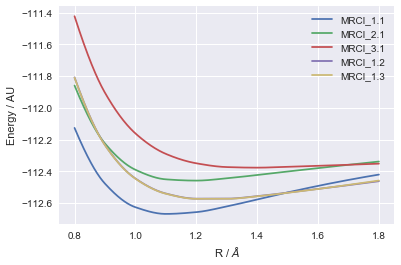

In [6]:
t = np.linspace(0.8, 1.8, 500)

plt.plot(t, interpolator_MRCI_1_1(t), label="MRCI_1.1")
plt.plot(t, interpolator_MRCI_2_1(t), label="MRCI_2.1")
plt.plot(t, interpolator_MRCI_3_1(t), label="MRCI_3.1")
plt.plot(t, interpolator_MRCI_1_2(t), label="MRCI_1.2")
plt.plot(t, interpolator_MRCI_1_3(t), label="MRCI_1.3")

plt.xlabel("R / $\AA$")
plt.ylabel("Energy / AU")

plt.legend()

## Centered 

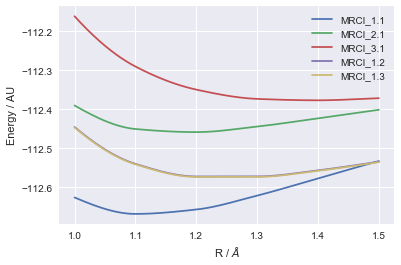

In [9]:
t = np.linspace(1.0, 1.5, 500)

plt.plot(t, interpolator_MRCI_1_1(t), label="MRCI_1.1")
plt.plot(t, interpolator_MRCI_2_1(t), label="MRCI_2.1")
plt.plot(t, interpolator_MRCI_3_1(t), label="MRCI_3.1")
plt.plot(t, interpolator_MRCI_1_2(t), label="MRCI_1.2")
plt.plot(t, interpolator_MRCI_1_3(t), label="MRCI_1.3")

plt.xlabel("R / $\AA$")
plt.ylabel("Energy / AU")

plt.legend()